# Titanic Project: Survival Analysis and Prediction

**This Titanic project marked the beginning of my journey into the world of Machine Learning**, and it was also my first step after transitioning from **my 8 years of experience programming in C/C++ at university**.

Throughout the analysis, I learned the fundamentals of building predictive models and data analysis, including key skills such as:

- **Handling missing data.**
- **Feature engineering.**
- **Creating visualizations** to identify patterns.
- **Building and evaluating classification models** to predict survival probabilities.

For this reason, **this project represents a significant step in my transition to data analysis and Machine Learning.**


### **Survival Analysis**
This project analyzes how various factors, such as age, gender, and social class, influenced the likelihood of survival during the Titanic disaster. It combines data preprocessing, visualization, and machine learning to extract meaningful insights.  

### **Objectives**
- Handle missing data through cleaning and preprocessing techniques.  
- Create exploratory visualizations to uncover survival trends and patterns.  
- Develop and evaluate classification models to predict survival outcomes.  

### **Tools and Technologies**
- **Programming Language**: Python  
- **Libraries**: Pandas, Matplotlib, Seaborn, Scikit-learn  
- **Environment**: Jupyter Notebook  

## Data Analysis Approach

1. **Data Loading:** Import the dataset.
2. **Data Cleaning:** Handle missing values, transform categorical variables, and create new features.
3. **Exploratory Analysis:** Visualize relevant patterns (survival rates by gender, age, social class).
4. **Modeling:** Implement classification algorithms, including Logistic Regression, Random Forest, Decision Tree, KNN, Linear SVC, Perceptron, Support Vector Machines, Stochastic Gradient Descent, and Naive Bayes. Evaluate performance using key metrics such as accuracy and F1-score.
5. **Conclusions:** Interpret the results.

### Index

1. **[Introduction](#Introduction)**
2. **[Library Imports](#Library-Imports)**
3. **[Data Loading](#Data-Loading)**
4. **[Exploratory Data Analysis - EDA](#Exploratory-Data-Analysis-EDA)**
5. **[Data Preprocessing](#Data-Preprocessing)**
6. **[Machine Learning Classification Models](#Machine-Learning-Models)**
7. **[Model Comparison](#Model-Comparison)**
8. **[Results and Conclusions](#Results-and-Conclusions)**

<a name="Introduction"></a>

### 1. Introduction

The Titanic symbolizes a moment of both splendor and tragedy in history (April 15, 1912). This project approaches the disaster from an analytical perspective, applying Machine Learning techniques to evaluate which factors were decisive in the survival rate. Out of the 2,224 passengers on board, 722 survived (a survival rate of 32%). Therefore, the survival rate will be analyzed in relation to various features in the dataset, such as age, gender, passenger class, and other relevant factors.

<a name="Library-Imports"></a>

### 2. Library Imports

In [6]:
# Libraries for Data Manipulation and Preparation
import pandas as pd
import numpy as np
import random as rnd

# Libraries for Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Machine Learning Models for Classification
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

<a name="Data-Loading"></a>

### 3. Data Loading

Pandas is essential in Python for data manipulation and analysis. It is used to load, clean, and transform the dataset efficiently, which is crucial for preparing the data before modeling.

In [8]:
# Reading the Training Data
train_df = pd.read_csv('train.csv')

# Reading the Test Data
test_df = pd.read_csv('test.csv')

# Grouping the train_df and test_df DataFrames into a list to apply transformations uniformly to both datasets.
combine = [train_df, test_df] 

<a name="Exploratory-Data-Analysis-EDA"></a>

### 4. Exploratory Data Analysis - EDA

Exploratory data analysis is crucial for extracting insights and properly preparing data for modeling. By better understanding the factors that influenced passenger survival, more robust and accurate models can be built to predict the probability of survival in similar situations.

In [10]:
# Summary of the structure of both DataFrames (Data types, features, and null observations)
train_df.info()
print('_'*50)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
__________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0  

In [11]:
# Visualization of the features (columns) in the Training Set
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [12]:
# Visualization of the features (columns) in the Test Set
print(test_df.columns.values)

['PassengerId' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare'
 'Cabin' 'Embarked']


### Types of Features in the Dataset

Analyzing the dataset's features is essential to understanding patterns, identifying key variables, relating the variables, and preparing the data for modeling.

### Categorical Features

These variables classify passengers into specific groups. They are divided into:

- Nominal: Survival (0 = did not survive, 1 = survived), Sex (0 = female, 1 = male), and Embarkation (S, Q, and C).
- Ordinal: Class (Pclass), which indicates a hierarchical order (1st, 2nd, and 3rd class).

### Numerical Features

These variables show numerical variations among passengers. They are classified into:

- Continuous: Age and Fare, which can take any value within a specific range.
- Discrete: SibSp (number of siblings/spouses aboard) and Parch (number of parents/children aboard), which are countable values.

**Knowing how to differentiate the dataset's features is crucial for selecting the appropriate type of visualizations for each feature (bar charts for categorical variables and histograms for numerical variables), facilitating data interpretation.**

In [16]:
# Visualization of the first 10 rows of the Training Set
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [17]:
# Visualization of the last 5 rows of the Training Set
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### Main Observations

- **Null Values**: The "Age" and "Cabin" columns contain `NaN` values, which must be handled before the modeling stage.
  
- **Useful Information in "Name"**: Titles in the names (e.g., Mr., Miss) can be extracted as new features, providing additional context.
  
- **"Ticket" Column**: Contains alphanumeric data that, if not useful, could be discarded or processed to extract relevant information.

**Addressing these observations will improve data quality and, consequently, model performance.**

In [19]:
# Descriptive Statistics of Numerical Columns in the Training DataFrame
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


From the table above, the following can be deduced:

- **Survival Rate ('Survived'):** The mean value in the 'Survived' column is 0.38, indicating that approximately 38.4% of the passengers survived (different from the initial 32% survival rate).

- **Passenger Class ('Pclass'):** The mean of 2.31 suggests that most passengers were in classes 2 and 3, which were the most affordable, as class 1 was the wealthiest.

- **Age ('Age'):** There are 714 records with values in 'Age,' meaning 177 values are missing in this column (891 - 714). The mean age is 29.7 years, with a range from 0.42 years to 80 years.

- **Fare ('Fare'):** The average fare is 32.20 monetary units, but it shows high variability (standard deviation of 49.69), with a maximum fare of 512.33.

In [21]:
# Descriptive Statistics of Categorical Columns in the Training DataFrame
train_df.describe(include=['O'])  # '0' ----> Object

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


### Conclusions on the Descriptive Statistics of Categorical Variables:

- **Unique Values**: The "Sex" column logically has 2 unique values (male and female), while "Embarked" has 3 (S, C, Q), representing the ports of embarkation.

- **Frequency of Values**: The "male" category is predominant in "Sex" with 577 records. In "Embarked," most passengers boarded at port "S" (644).

- **Columns with High Variability**: The "Ticket" and "Cabin" columns have many unique values (681 and 147, respectively), indicating high variability and potential challenges in processing them.

- **Null Values in "Cabin"**: There are only 204 non-null values in "Cabin," suggesting many missing values (`NaN`) that need to be addressed.

### Relationships Between Numerical Features

Pivot tables are a practical tool for exploring relationships and identifying patterns between the different features in the dataset. They allow us to summarize data and quickly uncover insights. For example, we can use them to observe if survival rates vary based on any of the numerical features.


### Correlation Analysis Between Dataset Features (Pivot Tables)

### Survival vs. PClass

The goal is to observe whether the passenger class influences the likelihood of survival.

In [25]:
# Calculation of the average survival rate by class (PClass) and sorting them in descending order.
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


### Conclusions on Survival vs. PClass

- **Higher Survival in First Class**: Passengers in first class (PClass = 1) have the highest survival rate (62.96%), suggesting that class directly influences the chances of survival.

- **Decrease in Lower Classes**: The survival rate decreases in second class (47.28%) and is much lower in third class (24.24%).

- **Impact of Class on Outcome**: This analysis shows that social class played a significant role in survival, possibly due to differences in access to lifeboats or location on the ship.

### Survival vs. Sex

This analysis examines whether gender had a significant impact on the passengers' chances of survival.

In [28]:
# Calculation of the average survival rate by gender
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


### Conclusions on Survival vs. Sex

- **Higher Survival Among Women**: Women have a significantly higher survival rate (74.20%) compared to men (18.89%).

**This analysis suggests that gender was an important factor in survival, possibly due to the priority given to women during the evacuation.**

### Survival vs. SibSp

This analysis examines whether traveling with siblings or a spouse influenced the chances of survival.

In [31]:
# Calculation of the average survival rate based on the number of siblings or spouse aboard.
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


### Conclusions on Survival vs. SibSp

- **Higher Survival with 1 Companion**: Passengers traveling with 1 companion (SibSp = 1) have the highest survival rate (53.59%).

- **Decreasing Trend**: Survival decreases as the number of companions increases, with a lower rate for those with 2 companions (46.43%) and even lower with 3 or more.

- **Passengers Traveling Alone**: Passengers traveling alone (SibSp = 0) have a survival rate of 34.54%.

**Traveling with a companion seems to increase the chances of survival, but this benefit decreases as the number of companions grows.**

### Survival vs. Parch

This analysis examines whether the presence of direct family members influenced the chances of survival.

In [34]:
# Calculation of the average survival rate based on the number of parents (or children) accompanying the passenger. 
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


### Conclusions on Survival vs. Parch

- **Highest Survival with 3 Family Members**: Passengers traveling with 3 direct family members (parents or children) have the highest survival rate (60%).

- **Moderate Survival with 1 or 2 Family Members**: Those with 1 or 2 family members also show a good probability of survival (55.08% and 50%, respectively).

- **Passengers Without Family Members**: Passengers without direct family members (Parch = 0) have a lower survival rate (34.37%).

- **Zero Probability with 4 or More Family Members**: Traveling with 4 or more family members drastically reduces the chances of survival, with survival rates of 0% for 4 and 6 family members.

**This analysis suggests that traveling with a few direct family members increases the chances of survival, but having too many may decrease them.**


## Data Visualization

### Visualization of Age by Survival

Using **Seaborn**, a FacetGrid is created to show the age distribution based on survival. The dataset is divided into two columns: one for passengers who survived and another for those who did not. Histograms of age are then plotted for each group.

This type of visualization allows us to observe how age is distributed among passengers who survived and those who did not, helping to identify whether age is a relevant factor in survival probabilities.

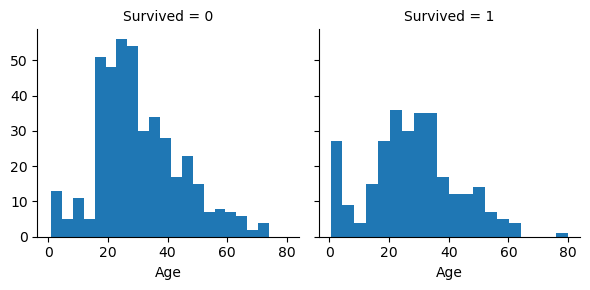

In [38]:
# Visualization of Age Distribution (in 20-year intervals) by Survival
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

### Conclusions on Age Distribution and Survival

- **Children and Young Passengers**: There is a higher proportion of children and young passengers who survived compared to adults.

- **Lower Survival Among Older Adults**: Most older adults (approximately 50 years and above) have a lower survival rate.

- **Age as a Relevant Factor**: The distribution suggests that age may influence survival probabilities, with higher survival rates among younger passengers.

**This analysis indicates that age should be considered in the learning models to be developed.**

### Visualization of Age by Survival and Passenger Class

A FacetGrid is created to display the age distribution segmented by survival and passenger class (Pclass).  
Each row represents a passenger class, and each column indicates whether the passenger survived or not.

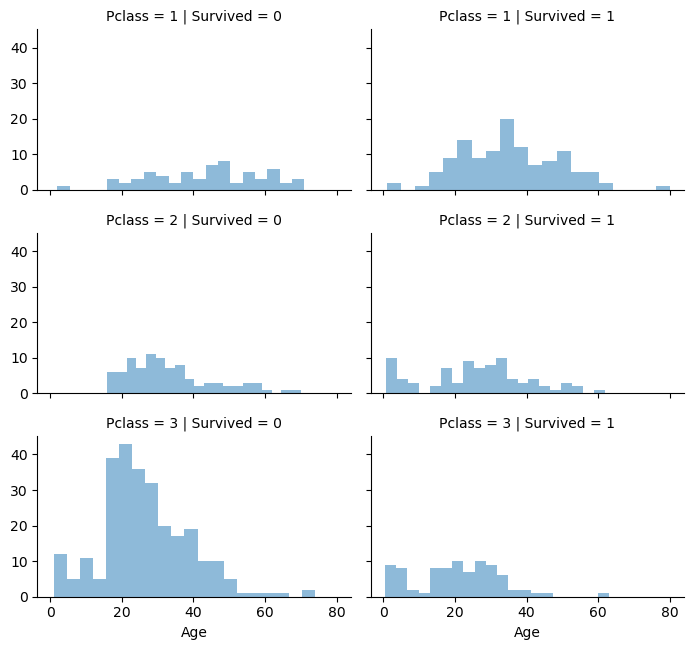

In [41]:
# Histogram of Ages (in 20-Year Intervals) by Survival and Passenger Class (Pclass).
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)

### Conclusions on Age, Class, and Survival

- **First Class**: In first class, survival is more consistent across various ages, suggesting that passengers in this class had greater opportunities to survive regardless of age.

- **Second Class**: In second class, young and adult passengers show better survival rates. However, the number of older passengers is smaller, making it difficult to draw firm conclusions for this group.

- **Third Class**: Most passengers in third class who did not survive were young or children, indicating that being in this class reduced survival probabilities, especially for the younger age groups.

**This analysis suggests that both class and age influence survival probabilities, with a clear advantage for first-class passengers and a disadvantage for those in third class.**

### Correlation of Categorical Features

In the case of survival `Survived`, analyzing the relationship with categorical features such as `Embarked` or `Cabin` allows us to identify patterns and trends that influence survival probabilities.

C:\Users\mechi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\mechi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


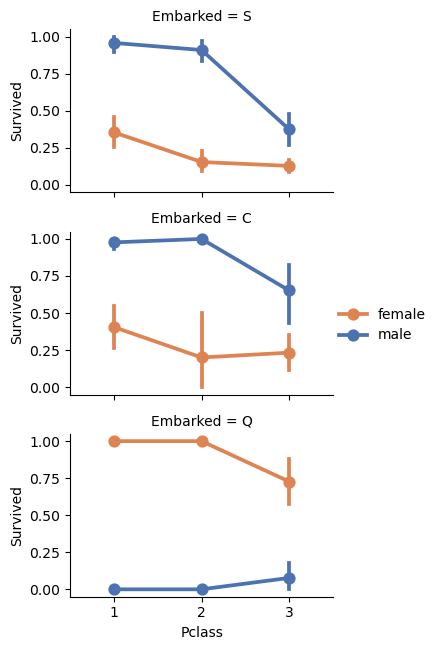

In [44]:
# Variation in Survival Based on Passenger Class and Gender, Grouped by Embarkation Port.
grid = sns.FacetGrid(train_df, row='Embarked', height=2.2, aspect=1.6)

# The point plot highlights the differences in survival rates by class and gender.
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')

# 'Sex' legend
grid.add_legend() 

## Conclusions on Survival by Gender, PClass, and Embarkation Port

This visual analysis explores how **survival** varies based on the three categorical variables: **gender**, **class**, and **embarkation port**. The insights reveal critical patterns that could be valuable for predictive models and trend analysis.

1. **Gender and Survival**: Women exhibit a **significantly higher survival rate** than men across all classes and ports. This pattern is especially pronounced in **first class**, where women have the highest survival rates, regardless of the embarkation port (although within the same port, such as S or C, men showed relatively higher survival rates).

2. **Class and Survival**: A **decline in survival rates is observed as class decreases** (from first to third class), for both men and women. This highlights a strong correlation between socioeconomic status (represented by class) and survival probabilities.

3. **Variation by Embarkation Port**:
   - **Southampton (S)**: Women in **first class** have a **high survival rate**, while men in **third class** show very low survival rates.
   - **Cherbourg (C)**: **Female survival** is high in **first class** and decreases in the lower classes, following a trend similar to other ports.
   - **Queenstown (Q)**: Men have an **extremely low survival rate** across all classes, while women show a decreasing survival trend from **first to third class**.

### Correlation Between Categorical and Numerical Features

The goal is to analyze how the numerical variable `Fare` varies based on categorical variables (gender, embarkation port, and survival) to identify patterns in ticket costs associated with survival.

C:\Users\mechi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\mechi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\mechi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\mechi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\mechi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\mechi\anaco

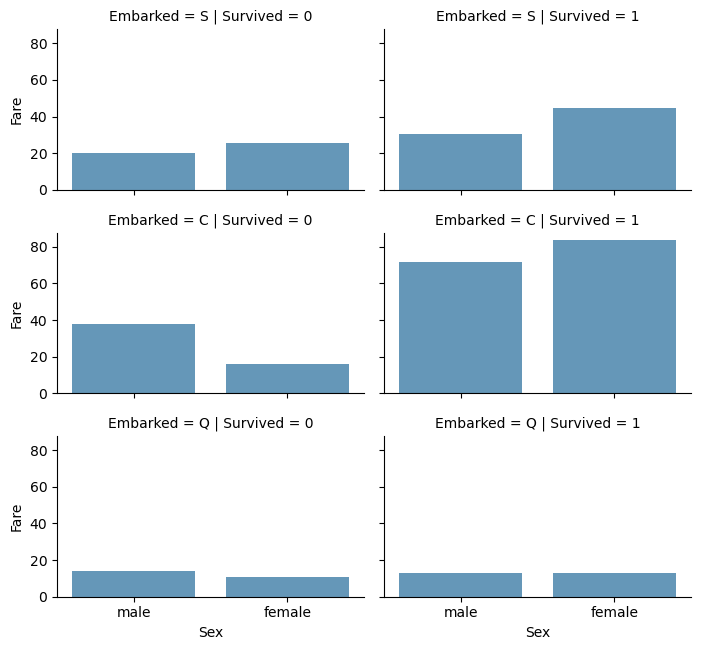

In [47]:
# Create a FacetGrid based on the Training DataFrame, where each row corresponds to an embarkation port category (Embarked) and 
# each column to a survival category (Survived).
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', height=2.2, aspect=1.6)

# Bar Plot for Each FacetGrid in the Grid, Using Gender (Sex) on the X-Axis and Average Fare (Fare) on the Y-Axis.
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.75, ci=None) 

# The 'y' axis shows the average fare, not the number of passengers.
grid.add_legend()

### Key Findings from the Analysis

1. **Fare and Survival by Port**:
   - In **Cherbourg (C)**, survivors paid higher average fares compared to non-survivors, whereas in **Southampton (S)** and **Queenstown (Q)**, the fare differences between these groups are less pronounced.

2. **Gender and Average Fare**:
   - In **Cherbourg (C)**, women who survived paid slightly higher fares than men. In Southampton and Queenstown, the differences between men and women are minimal.

3. **High Fares and Survival**:
   - Passengers with **higher fares** (especially in Cherbourg) had a greater likelihood of survival, possibly associated with their social class.

### General Conclusion
The **embarkation port** and the **fare amount** seem to influence the **likelihood of survival**, indicating a potential relationship between socioeconomic status and survival.

<a name="Data-Preprocessing"></a>

## 5. Data Preprocessing

### Purpose of Feature Elimination

When preparing data, we aim to **simplify and optimize** the feature set. There are several reasons why we might choose to remove a column or set of columns:

- **Irrelevance for analysis or modeling**:  
  If a column does not contain relevant information for our analysis, it can be considered as irrelevant data.

- **Redundancy**:  
  Some features may provide repeated or derived information from other columns. Keeping redundant data can overload the model and lead to less accurate results.

- **Missing data**:  
  Columns with too many null values can be problematic. Imputing missing values in columns with many gaps may introduce noise and bias, while removing them reduces this issue.

- **Reducing dimensionality**:  
  For machine learning algorithms, a high number of features can make the model more complex, less generalizable, and more prone to overfitting. Reducing dimensionality can improve the model's **efficiency** and **accuracy**.

### Removal of "Ticket" and "Cabin"

In this specific case, the `Ticket` and `Cabin` columns are removed for the following reasons:

- **Ticket**:  
  This feature contains a combination of letters and numbers representing a unique identifier for each passenger. However, it is believed to provide little to no information that would help predict variables of interest, such as **survival**.

- **Cabin**:  
  This column contains the cabin location for each passenger but is highly incomplete in the dataset. With a high percentage of null values, imputing or filling in this data is challenging and could **bias** the results of the analysis. Additionally, the cabin number itself may not be very relevant for survival analysis, especially given the high variability in cabin assignments.

---

Removing columns like `Ticket` and `Cabin` is an essential step in **data preprocessing**, contributing to:

- **Model optimization**: Reducing noise makes the model more efficient and less error-prone.
- **Clarity in analysis**: A cleaner dataset facilitates interpretation and visualization of results.
- **Reduced complexity**: Fewer columns mean lower computational load, improving algorithm performance.

In [50]:
# Display the dimensions of the datasets before removing the 'Ticket' and 'Cabin' columns.
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

# Remove the 'Ticket' and 'Cabin' columns from the training and testing datasets.
train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)

# Update the combine list with the modified datasets.
combine = [train_df, test_df]

# Display the dimensions of the datasets after removing the 'Ticket' and 'Cabin' columns.
print("After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

Before (891, 12) (418, 11) (891, 12) (418, 11)
After (891, 10) (418, 9) (891, 10) (418, 9)


### Creating a New Feature from `Name`

We aim to analyze whether we can extract useful information from the 'Name' column to create a new feature called 'Title' and check for any direct correlation between these titles and survival, before removing the 'Name' and 'PassengerId' features.

**Using Regular Expressions**

The pattern **(\w+\.)** captures the first word ending with a period within the 'Name' column. The option `expand=False` returns a DataFrame.

In [52]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

# Regular Expression: ' ([A-Za-z]+)\.'

  # 'space': The initial space in the expression indicates that there must be a space right before the following content (the title in this case).

  # 'A-Z': Matches any uppercase letter, and **'a-z'** matches any lowercase letter. This ensures the title can include both uppercase and lowercase letters.

  # '+': Indicates that there must be at least one letter, but there can be more (e.g., "Mr", "Mrs", "Dr").

  # '\.': The escape character '\.' ensures there is a period at the end. The period is a special character in regular expressions, so we use '\' to specifically match an actual period.

  # 'expand=False': Ensures the extraction result is a Pandas Series, not a DataFrame.

  # Finally, words like Mr, Mrs, Dr, etc., will be stored in a new column called 'Title'.

### Why Use `pd.crosstab()`?

The `pd.crosstab()` command is useful for various data analysis and cleaning tasks because:

### 1. Explores Relationships Between Categorical Variables
By analyzing the frequency of combinations, `pd.crosstab()` facilitates understanding **how different categories relate** to each other within a dataset.

### 2. Identifies Patterns and Trends
A crosstab allows us to **detect important patterns**, such as the relationship between titles and genders in a passenger dataset.

### 3. Verifies Data Quality
If unexpected or unusual combinations of values are found, `pd.crosstab()` helps **identify potential errors** in the data that may require cleaning or review. This ensures greater integrity and reliability in the analysis.

---

In summary, using `pd.crosstab()` not only helps us better understand the dataset but is also essential for improving **data quality** and extracting relevant insights to strengthen our analysis.

In [54]:
pd.crosstab(train_df['Title'], train_df['Sex'])

# The Pandas 'crosstab' function generates a contingency table (or cross-tabulation) between the variables 
# 'Title' and 'Sex' in the dataset (train_df or from combine, which includes both DataFrames?).

# A contingency table shows the frequency of combinations of values occurring in two or more categorical variables. 
# In this case, we are analyzing the relationship between the titles extracted from the 'Name' column (such as "Mr", "Mrs", "Dr", etc.) 
# and the passengers' gender (male or female).

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


### Observations

1. **Gender-Specific Titles**:
   - **Female**: Titles such as `Countess`, `Miss`, `Mme`, `Mrs`, and `Ms` are exclusively associated with the female gender.
   - **Male**: Titles such as `Capt`, `Col`, `Don`, `Jonkheer`, `Major`, `Master`, `Mr`, `Rev`, and `Sir` appear exclusively with the male gender.

2. **Relevant Titles for Analysis**:
   - **Mr** and **Miss** are the most common titles for each gender, with **517** and **182** occurrences, respectively. This suggests that these titles strongly correlate with passenger gender and could be useful for predictions related to gender or even survival probability.

3. **Noble or Rank Titles**:
   - Titles such as `Lady`, `Sir`, `Countess`, `Col`, and `Major` indicate specific ranks or statuses. These titles could be indicators of a higher social class, which, in the context of the Titanic, may have implications for survival analysis.

4. **Unique Titles**:
   - Some titles, such as `Dr`, `Rev`, and `Mme`, are less frequent and appear in only a few cases. Their low frequency suggests they might have limited direct predictive relevance but still add diversity to the `Title` feature.

### Conclusion on the New Feature

The creation of the `Title` feature captures **valuable information about gender, age, and social status** of the passengers. Therefore, this new feature can enhance the model by adding social and demographic context that was not available in the original dataset variables.

### Grouping Titles in the 'Title' Column

In [57]:
# Grouping titles as 'Rare'
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt'
, 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
# Calculation of the Average Survival Rate by Title
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


### Conclusions on the Average Survival Rate by Title

From the grouping by `Title`, the following conclusions can be drawn regarding the average survival rate:

1. **Mrs**: This title has the highest survival rate at **79.36%**, suggesting that married women had a higher likelihood of survival.

2. **Miss**: Also shows a high survival rate of **70.27%**, indicating that single or young women also had good chances of survival.

3. **Master**: With a survival rate of **57.5%**, this title, commonly associated with children, demonstrates favorable survival probabilities, possibly due to the priority given to children.

4. **Rare**: Less common titles have a survival rate of **34.78%**, suggesting that individuals with these titles (generally of high status or specific occupations) had a lower probability of survival compared to other groups.

5. **Mr**: With a survival rate of only **15.67%**, adult men have the lowest probability of survival within this grouping.

### Summary
The survival rate varies significantly by title, indicating that **gender, age, and possibly social status** influenced the chances of survival.

### Transformation of the `Title` Column in the Dataset

We aim to transform the `Title` column into numerical values to facilitate processing and modeling.

### Main Objective

This process assigns numerical values to the different titles (`Mr`, `Miss`, `Mrs`, etc.) in the dataset, enabling the model to interpret this categorical feature quantitatively. The code maps each title to a specific number to normalize these values within the dataset.

In [60]:
# Mapping to numerical values through the dictionary
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


### Removal of the `Name` Column from the DataFrame

We can now safely remove the `Name` column from the training and testing datasets. The `PassengerId` column is also unnecessary in the training dataset. These columns are removed because names do not directly impact the analysis, and `PassengerId` is just a unique identifier.

In [62]:
# Removal of the 'Name' and 'PassengerId' columns from both datasets.
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

### Conversion of the `Sex` Column to Numerical Values

The `Sex` column is transformed into numerical values, which is useful for models to process this categorical information.

- **Gender Mapping**:
  - The `map()` function is used to convert `female` to `1` and `male` to `0`. This allows the model to interpret the variable quantitatively.
  - Alternatively, `replace()` could also be used, serving a similar purpose in this case.

- **Conversion to Integer**:
  - Using `astype(int)`, the converted values are ensured to be of integer type, optimizing data processing and standardization.

In [64]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
    # Also "replace()" instead of "map()"

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


### Visualization of Age Distribution by Class and Gender

`FacetGrid` from Seaborn is used to visualize how the age distribution varies in the training dataset (`train_df`), differentiated by class (`Pclass`) and gender (`Sex`). This visualization is helpful for better understanding the structure and patterns within the data.

Segmenting by class and gender allows us to observe whether there are specific patterns in passenger age based on these categories. This can help identify relationships between these variables and how they may affect, for instance, survival probability in the Titanic analysis.

### Impact on the Machine Learning Model

This visualization helps to:
- **Detect Patterns**: Identify age differences between genders and classes, which may be relevant for modeling.
- **Feature Engineering Decisions**: Inspire the creation of new variables, such as specific age ranges based on class and gender.
- **Better Data Interpretation**: Provides insights that can guide preprocessing and feature selection decisions, potentially improving model performance.

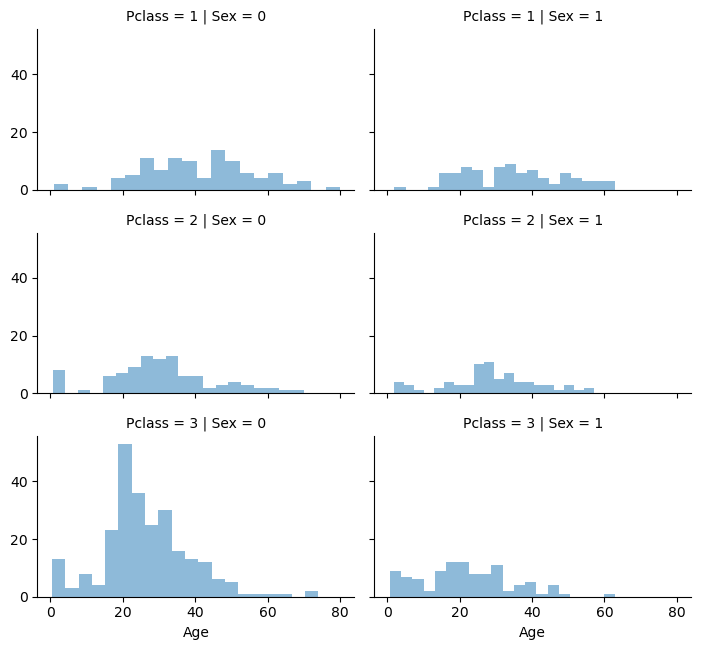

In [66]:
# Distribution of Age by 'PClass' and "Sex"
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

### Observations and Conclusions on Age Distribution by Class and Gender

1. **First Class**:
   - Men (`Sex = 0`) and women (`Sex = 1`) have a more balanced age distribution, with a higher concentration in adult ages (20-50 years).

2. **Second Class**:
   - The distribution is broader, but men still dominate in the 20-40 age range.
   - Women also show a higher concentration in this age range, though fewer in number compared to first class.

3. **Third Class**:
   - A younger population predominates, especially among men, with a significant peak in ages under 20.
   - The number of women is lower in comparison, but they are also concentrated in younger ages.

### Conclusions

- Economic class appears to influence passenger age, particularly in third class, where most passengers are younger.
- This pattern could be relevant for the machine learning model, as the combination of class, gender, and age may impact variables such as survival probability.

### Prepare an Empty Array for Estimated Age Values

We will start by preparing an empty array to hold the estimated "Age" values based on combinations of "Pclass" (Class) and "Gender". This means that for each combination of class and gender, we will calculate and store an estimated age value.

This approach allows us to make more accurate assumptions about passenger ages by considering correlated features that may influence age, such as the class they traveled in and their gender.

### Initialization of the `guess_ages` Matrix for Age Imputation

A matrix called `guess_ages` is initialized with dimensions `(2,3)`, where each cell contains zeros. This matrix will be used to store estimated age values based on passenger categories such as gender and class.

### Purpose

The `guess_ages` matrix is used to record average or estimated age values for specific groups (gender and class), enabling more accurate imputation of missing ages by considering relevant features.

### Outcome

It improves data quality without introducing significant biases by estimating ages in a categorized manner. This results in a more complete and prepared dataset for subsequent modeling.

In [70]:
#Empty array 
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

### Imputation of Missing Ages Based on Gender and Class

Missing values in the `Age` column of the combined datasets are imputed based on the median age according to the passengers' gender (`Sex`) and class (`Pclass`).

### Process Details:

1. **Median Calculation**:
   - For each combination of gender and class, the median age is calculated using non-null values in the `Age` column. The median is preferred over the mean due to its robustness against outliers.

2. **Age Imputation**:
   - Missing ages are filled with the median value calculated for the corresponding group, rounding values to multiples of 0.5 for greater consistency.

3. **Conversion to Integer**:
   - The `Age` column is converted to integer type for a more uniform and manageable format.

In [72]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & (dataset['Pclass'] == j+1)]['Age'].dropna()
  
            """ The median of Age is used because it is less sensitive to outliers compared to the mean."""
            age_guess = guess_df.median()

            """ Rounding through normalization to make the age a multiple of 0.5 """
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):         
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    """
    Conversion of Age to integer.
    If the Age column previously contained values like [22.5, 33.0, 18.0], after executing the following line, Age will contain [22, 33, 18].
    """
    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


### Conclusions

This imputation improves data integrity and allows the machine learning model to work with a more complete dataset, helping to avoid issues related to missing values.

### Creation of the `AgeBand` Column and Survival Analysis by Age Group

A new column called `AgeBand` is added to the training dataset, classifying passengers' ages into five equal-sized intervals. An analysis is then conducted to observe the average survival rate for each of these intervals.

1. **Creation of the `AgeBand` Column**:
   - The `pd.cut()` function is used to divide the `Age` column into five bands or age ranges.
   - This new column categorizes passengers into age groups, making it easier to perform a comparative analysis of survival rates across different ages.

2. **Survival Analysis**:
   - The dataset is grouped by the `AgeBand` column, and the average survival rate is calculated for each group.
   - The `groupby()` function is used to obtain grouped statistics, and `sort_values()` organizes the results in ascending order by age range.

In [75]:
# The 1st Line:
# Creates a new column called AgeBand in the train_df DataFrame. This column groups passengers' ages into 5 equal-sized ranges (or "bands") using the pd.cut() function.

# The 2nd Line:
# Groups the data by age ranges (AgeBand).
# Calculates the mean of the Survived column for each age range (NOTE: MEAN OF SURVIVED, THE REMAINING VARIABLE AFTER "groupby").
# Sorts the results in ascending order by age range.

train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

C:\Users\mechi\AppData\Local\Temp\ipykernel_16884\3020099063.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)


,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


### Key Findings from the Age Band Analysis

1. **Age Group 0-16 Years**:
   - Has the highest survival rate (55.0%). This suggests that younger passengers had a greater chance of survival, likely due to evacuation priorities.

2. **Age Group 64-80 Years**:
   - Shows the lowest survival rate (9.1%). Older individuals faced greater challenges in surviving, possibly due to physical limitations and lower rescue priorities.

3. **Age Group 16-32 Years**:
   - Has a relatively low survival rate (33.7%). This group, which includes many young adults, shows a lower survival probability compared to children.

4. **Intermediate Groups (32-64 Years)**:
   - Survival rates are moderate, with slight variations. The 48-64 age range (43.5%) has a higher survival rate than the 32-48 range (41.2%).

### Conclusion

The analysis reveals that age is a significant factor in passenger survival. Younger passengers have clear advantages in survival probabilities, while older passengers have the lowest survival rates. These observations can inform the creation of new age-based features for predictive models.

### Mapping `Age` to Numerical Features

The `Age` column in the dataset is classified into numerical features based on predefined age intervals from the previous lines:

- Age ≤ 16 is assigned to category `0`.
- Age between 17 and 32 is assigned to category `1`.
- Age between 33 and 48 is assigned to category `2`.
- Age between 49 and 64 is assigned to category `3`.
- Age > 64 remains without explicit modification in the code.

### Purpose

The purpose of this transformation is to convert the `Age` variable into a numerically encoded categorical variable, simplifying its use in models. This approach can enhance the model's ability to identify patterns related to age by representing age ranges in a more manageable and comparable format.

In [78]:
# Classify the Age column in the dataset into numerical features based on predefined age intervals from the previous lines.
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train_df.head()
# Also "combine[1].head()"

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


### Conclusions on Mapping to Numerical Features

This mapping allows the `Age` variable to be more easily interpreted by machine learning models, enhancing the identification of patterns associated with age. Additionally, using numerical features simplifies data processing and the creation of predictive models.

### Code Explanation

We will remove the `AgeBand` column from the training dataset (`train_df`) and recombine `train_df` and `test_df` into the `combine` list to apply future processes simultaneously to both datasets.

In [81]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


### Creation of the `FamilySize` Column and Survival Analysis

A new column `FamilySize` is created to represent the family size of each passenger by summing the `SibSp` (siblings/spouse) and `Parch` (parents/children) columns, plus one to include the passenger themselves. The goal is to analyze how family size influences the survival rate, enabling the identification of patterns related to survival in family groups.

In [83]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
# The +1 is added to include the passenger themselves in the family count.

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


### Conclusions on `FamilySize` and Survival Analysis

The results show that passengers with a family size between 2 and 4 have higher survival rates, while those with very large families (≥5) or no family members (1) have significantly lower survival rates. This suggests that a moderate family size may have positively influenced survival, possibly due to mutual support during evacuation.

### Creation of the `IsAlone` Column and Survival Analysis

A new column called `IsAlone` is introduced, indicating whether a passenger was traveling alone (`1`) or not (`0`). The goal is to analyze how traveling alone affects the survival rate, identifying whether being alone negatively impacts the chances of survival.

In [86]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


### Conclusions on `IsAlone` and Survival Analysis

The results indicate that passengers who traveled with companions (`IsAlone = 0`) had a higher survival rate (50.6%) compared to those who traveled alone (`IsAlone = 1`), whose survival rate was significantly lower (30.4%). This suggests that traveling alone reduced the chances of survival.

### Removal of Family-Related Columns for Simplification

The `Parch`, `SibSp`, and `FamilySize` columns are removed from the training and testing datasets. The goal is to simplify the dataset, as the information from these columns has been consolidated into the new `IsAlone` variable, optimizing data analysis and modeling.

In [89]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


### Conclusions on Dataset Simplification

The removal of the `Parch`, `SibSp`, and `FamilySize` columns has resulted in a cleaner dataset with the most relevant variables for analysis and modeling. The `IsAlone` variable, along with other key features, provides a more streamlined approach to evaluating passengers' survival probability.

### Creation of the `Age*Class` Column for Combined Analysis

A new column called `Age*Class` is created in the training and testing datasets by multiplying a passenger's age (`Age`) by their class (`Pclass`). The purpose is to explore the interaction between age and class as a combined feature, which could provide additional insights to the machine learning model about how these two variables jointly influence survival.

### Why is this done?

Multiplying two variables allows capturing the interaction between them, highlighting potential patterns that might not be evident when analyzed separately. In this case, combining `Age` and `Pclass` helps uncover whether the relationship between age and class significantly impacts survival probability. For instance, it might reveal if younger passengers in higher classes are more likely to survive compared to older passengers in lower classes.

### What is achieved?

By adding this new combined feature, the model is enhanced by enabling it to more comprehensively consider the simultaneous influence of age and class on survival. This potentially improves predictive capacity and model accuracy, as it captures important interactions that may affect the outcome.

In [92]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

# The colons are used to select all row indices in the DataFrame.
train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


### Conclusions on the `Age*Class` Analysis

The output shows that the new `Age*Class` column reflects how the combination of a passenger's age and class translates into different numerical values. This enables the machine learning model to better capture the interaction between these variables, potentially highlighting specific patterns regarding how age and class jointly influence survival probability.

### Determining the Most Frequent Embarkation Port `Embarked`

The goal is to find the most frequent value (the mode) in the `Embarked` column of the `train_df` DataFrame, excluding null values.

### Considerations

- **Simplicity**: A quick and easy approach to implement.
- **Potential Inaccuracy**: It may be inaccurate if missing values do not follow the same pattern as the existing data.

### Alternatives

- **Advanced Imputation**: Use methods like `KNNImputer` or predictive models for more accurate imputation.
- **Feature-Based Imputation**: Utilize other variables to aid in imputation (e.g., imputing based on passenger class).
- **Handling Missing Values**: Some models, such as `XGBoost` or `LightGBM`, can handle null values without requiring imputation.

In [95]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [96]:
# Iterate through each DataFrame in the combine list and fill the null values in the Embarked column with 'freq_port'. 
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)

# Calculation of the average survival rate for each Embarked value in train_df, and sorting the results in descending order of survival rate.
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


### Conclusions

Using the mode to fill missing values is an acceptable and common practice in Machine Learning, especially for categorical variables. However, it is important to note that this method may introduce some bias by assuming that the most frequent category adequately represents the missing values, which may not always be the case.

In summary, imputing with the mode is a good initial practice, but it is advisable to explore more advanced imputation methods to improve the **accuracy** and **representativeness of the model**.

### Encoding Categorical Variables for Modeling

Each DataFrame in the `combine` list is iterated over, converting the values in the `Embarked` column from categorical strings (`'S'`, `'C'`, `'Q'`) to integers (`0`, `1`, `2`). This process is commonly known as **categorical variable encoding**.

In [99]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


### Key Conclusions on Encoding the `Embarked` Variable

1. **Model Compatibility**: By converting categorical values to integers, models that only accept numerical data can process the `Embarked` column without issues.

2. **Simplicity in Analysis**: Encoding facilitates the comparison and analysis of the `Embarked` variable by representing its values numerically.

3. **Impact on the Model**: This transformation enables the algorithm to identify and learn patterns related to different embarkation ports and their potential influence on the target variable (passenger survival).

4. **Consistency**: Ensures that all DataFrames in the `combine` list have the same numerical representation, which is essential to avoid discrepancies during model training and validation.

### Filling Missing Values in the `Fare` Column

This code is used to fill the missing values in the `Fare` column of the `test_df` DataFrame, ensuring that the data used for evaluating the model is complete and consistent with the training data.

By replacing null values with the median of the non-null values, the central distribution of the data is preserved, minimizing the impact of outliers and ensuring that the models work with a more complete and robust dataset.

In [102]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

C:\Users\mechi\AppData\Local\Temp\ipykernel_16884\31889810.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)


,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,7.8292,2,1,1,6
1,893,3,1,2,7.0000,0,3,0,6
2,894,2,0,3,9.6875,2,1,1,6
3,895,3,0,1,8.6625,0,1,1,3
4,896,3,1,1,12.2875,0,3,0,3


### Conclusions and Analysis of Median Imputation

Filling the `Fare` column with the median ensures that missing values are robustly handled against outliers, preserving the representativeness of the central distribution.

### Advantages:
- **Less affected by extreme values**: The median is more stable than the mean when outliers are present.
- **Simplicity and speed**: It is easy to calculate and implement.

### Disadvantages:
- **Loss of variability**: It may reduce the column's variability, making the imputed data less reflective of potential patterns.
- **Non-contextual**: It does not consider possible relationships with other variables for a more precise imputation.

### Fare Segmentation for Survival Analysis

The `Fare` column in `train_df` is divided into 4 equal groups using `qcut`, creating a new column called `FareBand`. This segmentation allows for analyzing how survival rates vary across different fare ranges, providing valuable insights into the relationship between ticket cost and survival probabilities. This segmentation simplifies the `Fare` variable and facilitates categorical analysis in Machine Learning models.

In [105]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

C:\Users\mechi\AppData\Local\Temp\ipykernel_16884\2916669673.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)


,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


### Conclusions on `Fare` Segmentation

The analysis shows that survival rates increase with higher fare ranges, suggesting that passengers with more expensive tickets had higher chances of survival.

### Advantages and Disadvantages of Median Imputation

- **Advantages**: Robust against outliers, easy to implement.
- **Disadvantages**: Does not account for variability or relationships with other variables.

### Title: Encoding the `Fare` Variable into Numerical Categories

The `Fare` column in the `combine` dataset (`train_df` and `test_df`) is divided into numerical categories based on specific fare ranges. Each fare range is replaced with an integer value, simplifying analysis and facilitating the use of `Fare` as a categorical feature in the models. This enables the identification of patterns related to ticket fares and their influence on the target variable, such as passenger survival.

### Removal of the `FareBand` Feature

After the `Fare` column has been categorized and encoded into numerical values based on these ranges (via the following for loop), the `FareBand` column is no longer needed for the model and could be redundant.

In [108]:
# Encode the Fare column into numerical categories based on defined ranges to simplify its use in the models.
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

# Deleting og 'FareBand'
train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6
5,0,3,0,1,1,2,1,1,3
6,0,1,0,3,3,0,1,1,3
7,0,3,0,0,2,0,4,0,0
8,1,3,1,1,1,0,3,0,3
9,1,2,1,0,2,1,3,0,0


In [109]:
test_df.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,0,2,1,1,6
1,893,3,1,2,0,0,3,0,6
2,894,2,0,3,1,2,1,1,6
3,895,3,0,1,1,0,1,1,3
4,896,3,1,1,1,0,3,0,3
5,897,3,0,0,1,0,1,1,0
6,898,3,1,1,0,2,2,1,3
7,899,2,0,1,2,0,1,0,2
8,900,3,1,1,0,1,3,1,3
9,901,3,0,1,2,0,1,0,3


<a name="Machine-Learning-Models"></a>

### 6. Machine Learning Classification Models

For predicting survival in this particular case, classification models play a key role in determining whether a passenger survived based on features such as age, gender, and class. Models like **Support Vector Machines (SVMs)**, **K-Nearest Neighbors (KNN)**, and **Logistic Regression** are effective for analyzing structured datasets. Advanced techniques, including **Random Forest** and **Naive Bayes**, handle feature interactions and uncertainties. Approaches like **Perceptron**, **Stochastic Gradient Descent (SGD)**, and **Linear SVC** optimize predictions, while interpretable methods like **Decision Tree** help uncover the key factors influencing survival outcomes.

### Separation of Training and Testing Data

In [112]:
# Separate the independent and dependent variables from `train_df`
X = train_df.drop("Survived", axis=1)  # Independent variables (891 rows and 11 columns)
Y = train_df["Survived"]               # Pandas Series, dependent variable (891 rows, one-dimensional)

# Split the dataset into training and validation sets.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

### Survival Analysis on the Test Set

1. **Separate Independent and Dependent Variables:**
   ```python
   X = train_df.drop("Survived", axis=1)
   Y = train_df["Survived"]              

**`Y = train_df["Survived"]`: By selecting a single column from the DataFrame using train_df["Survived"], Pandas returns a Series (a one-dimensional structure).**

2. `X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)`: Splits the data into 80% for training (X_train, Y_train) and 20% for testing (X_test, Y_test). random_state=42 ensures the split is reproducible. The split results in:

Since (X, Y) contain 891 rows (or passengers):

- Training (X_train, Y_train): 80% → 712 rows (or passengers).
- Validation (X_test, Y_test): 20% → 179 rows (or passengers).

**Note**: In this analysis, it is unnecessary to use train_test_split to split the data into training and testing sets, as the project already provides these datasets separately.

### Logistic Regression Model

It is a **classification** model used to predict the probability of a class (or event). Based on historical data, this model allows us to identify patterns and classify observations into specific categories. In this case, the model has been trained and tested on a dataset to calculate its accuracy and measure its predictive capability.

1. `Y_test_pred = logreg.predict(X_test)`: Generates predictions on the test set.

2. `acc_test = round(accuracy_score(Y_test, Y_test_pred) * 100, 2)`: Accuracy: Percentage of correct predictions.

3. `f1_test = round(f1_score(Y_test, Y_test_pred, average='weighted') * 100, 2)`: The f1-score evaluates the balance between precision and recall, useful for imbalanced datasets like this case.

4. `conf_matrix = confusion_matrix(Y_test, Y_test_pred)`: Displays how many values were correctly or incorrectly classified.

5. `Y_test_pred = logreg.predict(X_test)`: Generates final predictions for the test set (test_df), which does not have known labels.

In [115]:
# Create and Train the Logistic Regression Model
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

# Calculate the accuracy on the training set
acc_train = round(logreg.score(X_train, Y_train) * 100, 2)

# Generate predictions on the validation set
Y_test_pred = logreg.predict(X_test)

# Calculate metrics on the validation set
acc_test_logreg = round(accuracy_score(Y_test, Y_test_pred) * 100, 2)
f1_test = round(f1_score(Y_test, Y_test_pred, average='weighted') * 100, 2)

# Display results
print(f"Accuracy on the Training Set: {acc_train}%")
print(f"Accuracy on the Test Set: {acc_test_logreg}%")
print(f"f1-score on the Test Set: {f1_test}%")
conf_matrix = confusion_matrix(Y_test, Y_test_pred)
print("Confusion Matrix of the Test Set:")
print(conf_matrix)

Accuracy on the Training Set: 80.9%
Accuracy on the Test Set: 78.77%
f1-score on the Test Set: 78.73%
Confusion Matrix of the Test Set:
[[87 18]
 [20 54]]


### Results of the Logistic Regression Model

#### **1. Accuracy**
- **Training Set:** 80.9%
- **Test Set:** 78.77%
  - **Interpretation:** The model generalizes reasonably well, with a small drop in accuracy when transitioning from training data to test data, indicating no significant overfitting.

---

#### **2. f1-score**
- **f1-score on the Test Set:** 78.73%
  - **Interpretation:** The F1-score shows that the model achieves a good balance between precision (avoiding false positives) and recall (avoiding false negatives).

---

#### **3. Confusion Matrix**


|                       | **Prediction: Did Not Survive** | **Prediction: Survived**   |
|-----------------------|---------------------------------|----------------------------|
| **Actual: Did Not Survive** | True Negatives (TN)          | False Positives (FP)       |
| **Actual: Survived**        | False Negatives (FN)         | True Positives (TP)        |

---

### Detailed Interpretation

1. **First Row:** People who **did not survive** (negative class).
   - **87 (TN - True Negatives):** The model correctly predicted that 87 people did not survive.
   - **18 (FP - False Positives):** The model incorrectly predicted that 18 people survived, but they did not.

2. **Second Row:** People who **survived** (positive class).
   - **20 (FN - False Negatives):** The model incorrectly predicted that 20 people did not survive, but they actually did.
   - **54 (TP - True Positives):** The model correctly predicted that 54 people survived.

---

### **Interpretation of Each Value**

1. **True Positives (TP = 54):**
   - These are people the model predicted as "Survived" and who actually survived.
   - Maximizing this number is desirable, especially if correctly identifying survivors is critical.

2. **False Negatives (FN = 20):**
   - These are people who actually survived, but the model predicted they did not.
   - This error can be more critical because the model fails to identify those who truly survived.

3. **False Positives (FP = 18):**
   - These are people who did not survive, but the model predicted they did.
   - This error is less severe in this case but still poses a problem.

4. **True Negatives (TN = 87):**
   - These are people who did not survive and were correctly predicted as "Did Not Survive" by the model.

---

### **Why the Confusion Matrix is Useful**

- **Beyond Accuracy:** 
   - It allows for analyzing specific errors instead of just measuring the percentage of correct predictions.
   - For example, it’s helpful to identify if the model performs better for one class over the other (class imbalance).

- **Model Diagnostics:**
   - It helps understand if the model has issues with **false positives** or **false negatives** and make adjustments if necessary.

---

### Confusion Matrix Summary

The confusion matrix provides detailed information about the model’s successes and errors:

- The model correctly identifies **141 out of 179 people (78.77%)**.
- The main errors are:
  - **20 False Negatives (FN):** People who survived but were not identified as such.
  - **18 False Positives (FP):** People who did not survive but were predicted to have survived.

---

### f1-score: What is it and Why is it Useful?

The **F1-score** is a metric that combines **precision** and **recall** into a single measure. It is especially useful in classification problems where balancing **false positives** and **false negatives** is crucial, such as in imbalanced datasets.

#### F1-score Formula:
\[
\text{F1-score} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
\]

- **Precision:** Indicates how well the model avoids false positives.
- **Recall (Sensitivity):** Indicates how well the model detects true positives.

---

### Relevance to this project

In this project, the **F1-score** helps evaluate how well the model classifies passengers who **survived** and **did not survive**:
- **Context:** Errors such as predicting someone did not survive when they actually did (**false negatives**) could be more critical depending on the objective.
- **Importance:** The F1-score balances performance across both classes (survived/did not survive), providing a more comprehensive view of the model’s effectiveness compared to accuracy alone.

### Support Vector Machine (SVM) Model

The **Support Vector Machine (SVM)** model is a classification technique used to separate data into different classes by finding the best decision boundary. This model efficiently classifies observations, especially when the classes are clearly separable. In this case, an SVM model has been trained and evaluated, providing an accuracy measure that reflects its effectiveness in predicting the correct class for new observations.

The code trains the model and evaluates its performance on the training and test sets. It also generates a confusion matrix to analyze errors.

1. `svc = SVC()`: Creates an SVM-based classifier.

2. `svc.fit(X_train, Y_train)`: Trains the model using the input data (X_train) and their labels (Y_train).

3. `Y_pred = svc.predict(X_test)`: Generates predictions on the test set.

4. `acc_train = round(svc.score(X_train, Y_train) * 100, 2)`: Calculates the accuracy on the training set.

5. `f1 = round(f1_score(Y_test, Y_pred, average='weighted') * 100, 2)`: Calculates the f1-score on the test set.

6. `acc_test = round(accuracy_score(Y_test, Y_pred) * 100, 2)`: Calculates the accuracy on the test set.

7. `conf_matrix = confusion_matrix(Y_test, Y_pred)`: Generates the confusion matrix.

In [200]:
# Create and Train the SVC Model
svc = SVC()
svc.fit(X_train, Y_train)

# Generate predictions on the test set
Y_pred = svc.predict(X_test)

# Calculate the accuracy on the training set
acc_train = round(svc.score(X_train, Y_train) * 100, 2)

# Calculate the accuracy on the test set
acc_test_svc = round(accuracy_score(Y_test, Y_pred) * 100, 2)

# Calculate the f1-score on the test set
f1 = round(f1_score(Y_test, Y_pred, average='weighted') * 100, 2)

# Generate the confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)

# Display results
print(f"Accuracy on the Training Set: {acc_train}%")
print(f"Accuracy on the Test Set: {acc_test_svc}%")
print(f"f1-score on the Test Set: {f1}%")
print("Confusion Matrix of the Test Set:")
print(conf_matrix)

Accuracy on the Training Set: 78.37%
Accuracy on the Test Set: 78.21%
f1-score on the Test Set: 78.33%
Confusion Matrix of the Test Set:
[[82 23]
 [16 58]]


### Analysis of the SVM Model Results

**1. Accuracy in Training and Test Sets**

- **Training:** The model achieves **78.37% accuracy**, indicating it correctly classifies most passengers in the training set.
- **Test:** The accuracy on the test set is similar, at **78.21%**, suggesting the model generalizes reasonably well and is not overfitted.

**Conclusion:** The model shows consistent performance between the training and test sets, indicating it is neither overfitted nor underfitted.

---

**2. Confusion Matrix**

- **True Negatives (TN = 82):** The model correctly predicted that **82 passengers did not survive**.
- **False Positives (FP = 23):** The model incorrectly predicted that **23 passengers survived** when they did not.
- **False Negatives (FN = 16):** The model incorrectly predicted that **16 passengers did not survive** when they actually did.
- **True Positives (TP = 58):** The model correctly predicted that **58 passengers survived**.

---

**3. Error Observations**

1. **False Negatives (16):**
   - These errors are critical if the goal is to correctly identify survivors, as they were not detected by the model.

2. **False Positives (23):**
   - Although the model identified passengers as survivors when they were not, this type of error may be less severe depending on the context.

**Conclusion:** The model has acceptable performance but could be improved to reduce false negatives, especially if the goal is to prioritize identifying survivors.

---

**4. Generalization**

- The small difference between training accuracy (78.37%) and test accuracy (78.21%) indicates that the model has good generalization capabilities for unseen data.

### K-Nearest Neighbors (KNN) Classification Model

The **K-Nearest Neighbors (KNN)** model is an other classification technique that predicts the class of an observation based on the classes of its nearest neighbors. This approach is useful for classifying data based on similarity to previous examples, without making assumptions about the data distribution. In this case, the KNN model has been trained and evaluated to measure its classification accuracy, allowing us to determine how well it identifies patterns in the data.

1. `knn = KNeighborsClassifier(n_neighbors=3)`: Creates a KNN classifier that considers the 3 nearest neighbors to classify observations.

2. `knn.fit(X_train, Y_train)`: Trains the model using the input data (X_train) and their labels (Y_train).

3. `Y_pred = knn.predict(X_test)`: Generates predictions on the test set.

4. `acc_train = round(knn.score(X_train, Y_train) * 100, 2)`: Calculates the accuracy on the training set.

5. `f1 = round(f1_score(Y_test, Y_pred, average='weighted') * 100, 2)`: Calculates the f1-score on the test set.

6. `acc_test = round(accuracy_score(Y_test, Y_pred) * 100, 2)`: Calculates the accuracy on the test set.

7. `conf_matrix = confusion_matrix(Y_test, Y_pred)`: Generates the confusion matrix.

In [124]:
# Creates the KNN classifier 
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)

# Generate predictions on the test set
Y_pred = knn.predict(X_test)

# Calculate the accuracy on the training set
acc_train = round(knn.score(X_train, Y_train) * 100, 2)

# Calculate the accuracy on the test set
acc_test_knn = round(accuracy_score(Y_test, Y_pred) * 100, 2)

# Calculate the F1-score on the test set
f1 = round(f1_score(Y_test, Y_pred, average='weighted') * 100, 2)

# Generate the confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)

# Display results
print(f"Accuracy on the Training Set: {acc_train}%")
print(f"Accuracy on the Test Set: {acc_test_knn}%")
print(f"f1-score on the Test Set: {f1}%")
print("Confusion Matrix of the Test Set:")
print(conf_matrix)

Accuracy on the Training Set: 85.39%
Accuracy on the Test Set: 81.01%
f1-score on the Test Set: 80.97%
Confusion Matrix of the Test Set:
[[89 16]
 [18 56]]


### KNN Model Conclusions

#### **1. Accuracy**
- **Training Set:**  
  - Accuracy: **85.39%**, indicating the model correctly classifies most training data.
- **Test Set:**  
  - Accuracy: **81.01%**, showing the model generalizes well to unseen data.

#### **Accuracy Differences**  
- The small gap between training (85.39%) and test (81.01%) accuracy indicates no significant overfitting.  
- A large gap would suggest overfitting, while low accuracy on both sets would indicate underfitting.

---

#### **2. Confusion Matrix**
- **True Negatives (TN = 89):** Predicted 89 passengers correctly as not surviving.
- **False Positives (FP = 16):** Predicted 16 passengers as surviving when they did not.
- **False Negatives (FN = 18):** Missed 18 survivors, predicting they did not survive.
- **True Positives (TP = 56):** Correctly identified 56 survivors.

---

### **F1-Score: 80.97%**

1. **Good Precision and Recall Balance:**  
   - An F1-score of **80.97%** shows the model effectively handles false positives and false negatives.

2. **Relation to Accuracy:**  
   - The F1-score is close to the accuracy (**81.01%**), reflecting consistent performance without bias.

3. **Key Errors:**  
   - **18 false negatives** highlight missed survivors, which may be critical depending on the goal.

4. **Overall Performance:**  
   - The F1-score demonstrates solid model performance and good generalization to test data.

5. **Potential Improvements:**  
   - Adjust model parameters (e.g., `n_neighbors` in KNN).  
   - Focus on recall to improve survivor identification if needed.

### Naive Bayes Classification Model (Gaussian)

This is a probability-based classification model that assumes the features follow a normal (Gaussian) distribution. This approach enables fast and efficient classification, especially when the features are independent of each other. By training the model on a dataset, we can measure its accuracy and use it to make probabilistic and precise predictions on new observations.

1. `gaussian = GaussianNB()`: Creates a Naive Bayes classifier that assumes features follow a Gaussian distribution.

2. `gaussian.fit(X_train, Y_train)`: Trains the model using the input data (X_train) and their labels (Y_train).

3. `Y_pred = gaussian.predict(X_test)`: Generates predictions on the test set.

4. `acc_train = round(gaussian.score(X_train, Y_train) * 100, 2)`: Calculates the accuracy on the training set.

5. `f1 = round(f1_score(Y_test, Y_pred, average='weighted') * 100, 2)`: Calculates the f1-score on the test set.

6. `acc_test = round(accuracy_score(Y_test, Y_pred) * 100, 2)`: Calculates the accuracy on the test set.

7. `conf_matrix = confusion_matrix(Y_test, Y_pred)`: Generates the confusion matrix.

In [128]:
# Create and Train the Gaussian Naive Bayes Model
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)

# Calculate the accuracy on the training set
acc_train = round(gaussian.score(X_train, Y_train) * 100, 2)

# Generate predictions on the test set
Y_pred = gaussian.predict(X_test)

# Calculate the accuracy on the test set
acc_test_gaussNB = round(accuracy_score(Y_test, Y_pred) * 100, 2)

# Calculate the F1-score on the test set
f1 = round(f1_score(Y_test, Y_pred, average='weighted') * 100, 2)

# Generate the confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)

# Display results
print(f"Accuracy on the Training Set: {acc_train}%")
print(f"Accuracy on the Test Set: {acc_test_gaussNB}%")
print(f"f1-score on the Test Set: {f1}%")
print("Confusion Matrix of the Test Set:")
print(conf_matrix)

Accuracy on the Training Set: 73.74%
Accuracy on the Test Set: 77.65%
f1-score on the Test Set: 77.67%
Confusion Matrix of the Test Set:
[[70 35]
 [ 5 69]]


### Conclusions of the Naive Bayes (Gaussian) Model

1. **Overall Accuracy:**
   - **Training (73.74%)** and **Test (77.65%)**: The model correctly identifies most cases but makes significant errors. This may be related to complex factors, such as certain social classes or age groups having harder-to-classify patterns.

2. **F1-score (77.67%):**
   - This value shows that the model reasonably balances identifying survivors and non-survivors. However, factors like **gender** (women surviving more frequently) or **social class** (first class with higher survival rates) might influence the errors.

3. **Errors in the Confusion Matrix:**
   - **False Positives (35):** Predicted 35 passengers as survivors incorrectly. This could be due to features resembling survivors, such as being women or traveling in first class, but actually belonging to a non-surviving group.
   - **False Negatives (5):** Only 5 survivors were not correctly identified. This indicates the model is efficient at recognizing survivors, especially those with clear patterns like women or children in higher classes.

4. **Demographic Context:**
   - **Gender:** Men are less likely to survive, which may explain why the model makes more errors by predicting men as survivors when they were not.
   - **Social Class:** Third-class passengers represent most fatalities, which might influence false positives if the model struggles to distinguish between classes.
   - **Age:** Children generally had a higher chance of survival, and the model may be better at identifying them accurately.

5. **Overall Performance:**
   - The model provides a reasonable analysis of survival patterns but could improve by better identifying combinations of factors such as **age**, **gender**, and **social class**, which are crucial in this dataset.

### Perceptron Classification Model

The Perceptron is one of the fundamental algorithms in neural networks and supervised learning. This model is used to solve **binary classification** problems by creating a **linear decision boundary** that separates two classes.

During training, the perceptron iteratively adjusts its weights to learn patterns in the data and classify new observations. Despite its simplicity, the perceptron lays the foundation for more advanced neural network architectures, providing an excellent introduction to how neural models function.

Unlike more advanced models such as **SVM** or **Random Forest**, the perceptron only works for **linearly separable** data and does not handle complex or non-linear relationships. However, its simplicity makes it an ideal starting point for learning the principles of supervised learning and classification.

In [131]:
# Create and Train the Perceptron Model  
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)

# Calculate the accuracy on the training set  
acc_train = round(perceptron.score(X_train, Y_train) * 100, 2)

# Generate predictions on the test set  
Y_pred = perceptron.predict(X_test)

# Calculate the accuracy on the test set
acc_test_perceptron = round(accuracy_score(Y_test, Y_pred) * 100, 2)

# Calculate the F1-score on the test set
f1 = round(f1_score(Y_test, Y_pred, average='weighted') * 100, 2)

# Generate the confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)

# Display results
print(f"Accuracy on the Training Set: {acc_train}%")
print(f"Accuracy on the Test Set: {acc_test_perceptron}%")
print(f"f1-score on the Test Set: {f1}%")
print("Confusion Matrix of the Test Set:")
print(conf_matrix)

Accuracy on the Training Set: 72.89%
Accuracy on the Test Set: 73.74%
f1-score on the Test Set: 73.93%
Confusion Matrix of the Test Set:
[[72 33]
 [14 60]]


### Analysis of the Perceptron Model Results

The model achieved an accuracy of **78.34%** on the training set, indicating that it correctly classifies about 78% of the observations. This level of accuracy is moderate and suggests that the model has captured some patterns in the data, though it may not be fully adequate for complex problems.

IMPORTANT: Since the perceptron creates a **linear decision boundary**, its performance may be limited in cases where the classes are not linearly separable. To improve results, more advanced models such as multilayer neural networks or non-linear methods could be tested, especially if it is suspected that the relationships between features and classes are more complex.

### Linear Support Vector Classifier (Linear SVC) Model

The **Linear SVC** model is efficient for binary classification problems, such as passenger survival, by finding a hyperplane that maximizes the margin between classes. Unlike models such as **KNN** or **Naive Bayes**, it adapts well to mixed data (categorical and continuous) and is scalable with many features. However, its main limitation is the assumption of linear separability, making it less flexible for more complex relationships that models like **Random Forest** or **KNN** can handle better.

In [134]:
# Create and Train the Linear SVC Model
linear_svc = LinearSVC(max_iter=10000)  # Must increase 'max_iter' if model doesn't converge
linear_svc.fit(X_train, Y_train)

# Calculate the accuracy on the training set  
acc_train = round(linear_svc.score(X_train, Y_train) * 100, 2)

# Generate predictions on the test set  
Y_pred = linear_svc.predict(X_test)

# Calculate the accuracy on the test set
acc_test_linearsvc = round(accuracy_score(Y_test, Y_pred) * 100, 2)

# Calculate the F1-score on the test set
f1 = round(f1_score(Y_test, Y_pred, average='weighted') * 100, 2)

# Generate the confusion matrix  
conf_matrix = confusion_matrix(Y_test, Y_pred)

# Display results
print(f"Accuracy on the Training Set: {acc_train}%")
print(f"Accuracy on the Test Set: {acc_test_linearsvc}%")
print(f"f1-score on the Test Set: {f1}%")
print("Confusion Matrix of the Test Set:")
print(conf_matrix)

Accuracy on the Training Set: 78.65%
Accuracy on the Test Set: 77.09%
f1-score on the Test Set: 77.12%
Confusion Matrix of the Test Set:
[[84 21]
 [20 54]]


### Conclusions of the Linear SVC Model

1. **Training and Test Accuracy:**
   - **Training (78.65%)** and **Test (77.09%)**: The model generalizes well, with a small margin of error. This indicates that it captures important patterns in features such as gender, age, and social class.

2. **F1-score (77.12%):**
   - Reflects an adequate balance between false positives and false negatives, being reasonably effective in classifying both survivors and non-survivors.

3. **Confusion Matrix:**
   - **False Negatives (20):** Some survivors (such as women or high-class passengers) were not correctly identified.
   - **False Positives (21):** Incorrect predictions of survivors, likely low-class passengers or young men that the model mistakenly associated with survival patterns.

### Stochastic Gradient Descent (SGD)

**Stochastic Gradient Descent (SGD)** is an iterative optimization algorithm used in linear models such as **Logistic Regression** and **Linear SVC**. Unlike other models like **KNN** or **Naive Bayes**, **SGD** updates the model parameters by adjusting the weights one sample at a time, instead of calculating the full gradient, making it efficient for large datasets. However, its performance relies on fine-tuning hyperparameters like the learning rate. In the Titanic dataset, **SGD** is useful for classifying survival, but as a linear approach, it may struggle with non-linear relationships between variables like social class or age.

In [137]:
# Create and Train the SGDClassifier Model
sgd = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd.fit(X_train, Y_train)

# Calculate the accuracy on the training set 
acc_train = round(sgd.score(X_train, Y_train) * 100, 2)

# Generate predictions on the test set 
Y_pred = sgd.predict(X_test)

# Calculate the accuracy on the test set  
acc_test_sgd = round(accuracy_score(Y_test, Y_pred) * 100, 2)

# Calculate the F1-score on the test set
f1 = round(f1_score(Y_test, Y_pred, average='weighted') * 100, 2)

# Generate the confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)

# Display results
print(f"Accuracy on the Training Set: {acc_train}%")
print(f"Accuracy on the Test Set: {acc_test_sgd}%")
print(f"f1-score on the Test Set: {f1}%")
print("Confusion Matrix of the Test Set:")
print(conf_matrix)

Accuracy on the Training Set: 75.42%
Accuracy on the Test Set: 74.3%
f1-score on the Test Set: 73.54%
Confusion Matrix of the Test Set:
[[91 14]
 [32 42]]


### Conclusions of the Stochastic Gradient Descent (SGD) Model

1. **Accuracy:**  
   - **Training (75.42%)** and **Test (74.3%)**: Indicates moderate performance with minimal difference between the two sets, suggesting that the model is not overfitted but has limitations in predictive capacity.

2. **F1-score (73.54%):**  
   - Reflects a balance between precision and recall. Errors are significant, particularly in correctly identifying survivors.

3. **Confusion Matrix:**  
   - **False Negatives (32):** Passengers who survived but were not correctly classified, possibly men or lower-class passengers.  
   - **False Positives (14):** Passengers incorrectly classified as survivors, likely with characteristics similar to actual survivors, such as women or children.

### Decision Tree Model

The **Decision Tree** model is a supervised algorithm that classifies data by creating a hierarchical structure of decisions based on simple rules. In the case of the Titanic dataset, this model splits the data using features like gender, age, and social class to predict survival. Unlike linear models such as **Linear SVC** or **Logistic Regression**, the Decision Tree can capture non-linear relationships between variables, making it more flexible. However, its main drawback is its tendency to overfit if parameters are not properly optimized, distinguishing it from more robust models like **Random Forest** or **Gradient Boosting**.

In [140]:
# Create and Train the Decision Tree Model
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, Y_train)

# Calculate the accuracy on the training set
acc_train = round(decision_tree.score(X_train, Y_train) * 100, 2)

# Generate predictions on the test set
Y_pred = decision_tree.predict(X_test)

# Calculate the accuracy on the test set
acc_test_decision_tree = round(accuracy_score(Y_test, Y_pred) * 100, 2)

# Calculate the F1-score on the test set
f1 = round(f1_score(Y_test, Y_pred, average='weighted') * 100, 2)

# Generate the confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)

# Display results
print(f"Accuracy on the Training Set: {acc_train}%")
print(f"Accuracy on the Test Set: {acc_test_decision_tree}%")
print(f"f1-score on the Test Set: {f1}%")
print("Confusion Matrix of the Test Set:")
print(conf_matrix)

Accuracy on the Training Set: 87.22%
Accuracy on the Test Set: 82.12%
f1-score on the Test Set: 82.16%
Confusion Matrix of the Test Set:
[[88 17]
 [15 59]]


### Conclusions of the Decision Tree Model

1. **Accuracy:**
   - **Training (87.22%)** and **Test (82.12%)**: Indicates good performance, though the difference suggests slight overfitting. The model learns clear patterns, such as the high survival rate of women and first-class passengers.

2. **F1-score (82.16%):**
   - Reflects a solid balance between precision and recall, highlighting the model's ability to correctly classify both survivors and non-survivors.

3. **Confusion Matrix:**
   - **False Positives (17):** Some men or lower-class passengers were incorrectly classified as survivors.
   - **False Negatives (15):** Survivors not correctly identified, possibly children or passengers from lower classes.

The model demonstrates solid overall performance, effectively capturing key patterns related to survival.

### Random Forest Model

The **Random Forest** model combines multiple decision trees to improve accuracy and reduce the risk of overfitting. In this case, the model uses votes from several trees to predict survival based on features like gender, age, and social class. Unlike a **Decision Tree**, which can overfit the data, Random Forest is more robust by averaging multiple models. Additionally, compared to linear models like **Linear SVC** or **Logistic Regression**, Random Forest captures non-linear and hierarchical relationships between variables, making it ideal for more complex problems.

In [143]:
# Create and Train the Random Forest Model
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, Y_train)

# Calculate the accuracy on the training set
acc_train = round(random_forest.score(X_train, Y_train) * 100, 2)

# Generate predictions on the test set
Y_pred = random_forest.predict(X_test)

# Calculate the accuracy on the test set
acc_test_randomforest = round(accuracy_score(Y_test, Y_pred) * 100, 2)

# Calculate the F1-score on the test set
f1 = round(f1_score(Y_test, Y_pred, average='weighted') * 100, 2)

# Generate the confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)

# Display results
print(f"Accuracy on the Training Set: {acc_train}%")
print(f"Accuracy on the Test Set: {acc_test_randomforest}%")
print(f"f1-score on the Test Set: {f1}%")
print("Confusion Matrix of the Test Set:")
print(conf_matrix)

Accuracy on the Training Set: 87.22%
Accuracy on the Test Set: 81.01%
f1-score on the Test Set: 81.01%
Confusion Matrix of the Test Set:
[[88 17]
 [17 57]]


### Conclusions of the Random Forest Model

1. **Accuracy:**
   - **Training (87.22%)** and **Test (81.01%)**: The model demonstrates solid performance, though with some degree of overfitting due to the high accuracy on the training set.

2. **F1-score (81.01%):**
   - Indicates a balanced performance between precision and recall, effectively capturing key patterns such as the high survival rate of women and first-class passengers.

3. **Confusion Matrix:**
   - **False Positives (17):** Some men or lower-class passengers were incorrectly classified as survivors.
   - **False Negatives (17):** Some actual survivors were not identified, possibly men from lower classes.

The Random Forest model effectively identifies major patterns but could still be optimized to reduce errors.

<a name="Model-Comparison"></a>

### 7. Model Comparison

The following code organizes and compares the performance of various Machine Learning models in the Titanic project, sorting them from highest to lowest accuracy. By building a **DataFrame** with the names of the models and their respective accuracy scores, we can identify which models achieved the best results in predicting passenger survival.

In [146]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_test_svc, acc_test_knn, acc_test_logreg, 
              acc_test_randomforest, acc_test_gaussNB, acc_test_perceptron, 
              acc_test_sgd, acc_test_linearsvc, acc_test_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
8,Decision Tree,82.12
1,KNN,81.01
3,Random Forest,81.01
2,Logistic Regression,78.77
0,Support Vector Machines,78.21
4,Naive Bayes,77.65
7,Linear SVC,77.09
6,Stochastic Gradient Decent,74.30
5,Perceptron,73.74


<a name="Results-and-Conclusions"></a>

### 8. Results and Conclusions

**1. Model Performance**
The models evaluated in this project can be applied to various business and financial problems, with similar results depending on the data type:

- **Decision Tree (82.12%)**: Suitable for complex, non-linear problems like credit default prediction, customer segmentation, or credit risk analysis.
  
- **KNN (81.01%)** and **Random Forest (81.01%)**: Effective for classification tasks such as predicting repeat purchases or behavior-based segmentation.
  
- **Logistic Regression (78.77%)** and **Support Vector Machines (78.21%)**: Best for linear problems like fraud detection or customer churn analysis.
  
- **Naive Bayes (77.65%)**: Useful for simple tasks such as spam detection or quick text classification.
  
- **Linear SVC (77.09%)**, **SGD (74.30%)**, and **Perceptron (73.74%)**: Suitable for basic classification tasks or as initial steps in more advanced pipelines.

---

**2. Business and Financial Applications**
1. **Key Features:**
   - In loan default prediction, features like income, payment history, and current debt are equivalent to Titanic variables like gender, class, and age.
   - In customer segmentation, purchase history, service usage frequency, and average spending are critical for identifying patterns.

2. **Common Errors:**
   - **False Positives:** In fraud detection, these represent transactions flagged as fraudulent when they are not, leading to unnecessary costs.
   - **False Negatives:** In churn prediction, these are missed identifications of customers likely to leave, resulting in lost retention opportunities.

---

**3. Future Improvements and Key Learnings**
1. **Local Validation:**
   - Splitting data into **training and validation sets** with `train_test_split` ensures robust performance evaluation and better model tuning.

2. **Hyperparameter Optimization:**
   - Fine-tuning parameters like the number of trees in Random Forest or the kernel in SVM can significantly improve performance.

3. **Feature Engineering:**
   - Creating derived variables (e.g., "Credit Utilization Percentage" or "Debt-to-Income Ratio") is as valuable in finance as "Family Size" was in Titanic.

4. **Model Interpretability:**
   - Models like Decision Tree and Logistic Regression are ideal for explaining business-level decisions, such as why a loan was approved or why a customer is classified as high risk.

---

**4. General Conclusion**
This project's learnings are transferable to sectors like business and finance. For example:
- **Random Forest and Decision Tree** excel in complex problems like credit risk prediction.
- **Logistic Regression** and **Naive Bayes** are great for quick, linear tasks like fraud detection or churn analysis.
- **Feature Engineering** and proper use of training and validation sets are standard practices applicable to any project.

This project highlights the importance of selecting and evaluating models based on the problem and data, a critical approach to solving real-world challenges.